In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, wilcoxon
import plotly.express as px
import plotly.graph_objects as go
import nbformat

from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib_venn import venn2
import os
import scipy.cluster.hierarchy as sch
from scipy.stats import ttest_rel, wilcoxon
from statsmodels.stats.multitest import multipletests

In [66]:
target_CAFs=["FAP", "PDGFRA", "PDGFRB", "S100A4", "LRRC15", "IL1R1", "IL1R2"]

In [67]:
fibr_gene_expression_modified=pd.read_csv("/Users/nikamikhailava/Desktop/batch_merged/filtered_fibroblasts_gene_exp_transposed_w_clinical.csv")
fibr_gene_expression_modified['dcc_filename'] = fibr_gene_expression_modified['dcc_filename'].str.replace('-', '.', regex=False)
fibr_gene_expression_modified

,dcc_filename,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,...,MAPK8IP2,ARSA,ACR,RABL2B,Sample,PFS_quartile,OS_quartile,BRCA_status,HRP_status,Segment
0,DSP.1001660016604.A.A02.dcc,1.718431,2.137428,1.836881,1.997698,0.161226,2.480789,4.364810,2.270061,0.033787,...,2.097976,1.991563,-0.115321,2.171023,S130_iOme,1,1,0.0,1.0,stroma
1,DSP.1001660016604.A.A04.dcc,1.622100,2.027326,1.737519,1.901971,0.158211,2.375319,5.534481,2.163770,0.033655,...,2.000658,2.633680,-0.114390,2.073686,S130_iOme,1,1,0.0,1.0,stroma
2,DSP.1001660016604.A.A05.dcc,1.427961,1.505719,1.830641,1.348903,0.165076,2.201253,5.497989,2.271254,0.033957,...,1.451180,2.419147,1.253395,1.018083,S130_iOme,1,1,0.0,1.0,tumor
3,DSP.1001660016604.A.A07.dcc,1.353614,1.787912,1.868598,1.631783,0.164922,2.126467,6.245903,2.308907,0.033950,...,1.166335,2.975583,1.474534,1.239250,S130_iOme,1,1,0.0,1.0,tumor
4,DSP.1001660016604.A.A08.dcc,1.829375,1.602863,1.291572,1.448092,0.164608,1.941802,3.836590,1.731314,0.033936,...,1.550127,2.550633,1.858295,1.623058,S130_iOme,1,1,0.0,1.0,stroma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,DSP.1001660037247.C.D01.dcc,1.808434,1.844244,1.772121,1.524628,-0.121914,1.967129,3.434814,2.026795,0.028477,...,1.655130,2.464421,-0.306182,1.698925,S333_pOme,3,1,0.0,1.0,stroma
419,DSP.1001660037247.C.D02.dcc,1.399579,1.726509,1.367213,1.114765,0.917727,2.449179,6.042179,2.140981,0.028518,...,0.842811,2.150309,0.731006,1.291812,S333_pOme,3,1,0.0,1.0,stroma
420,DSP.1001660037247.C.D03.dcc,0.084584,0.164450,-0.030218,-0.168501,-0.042646,0.429389,7.393944,0.414974,0.028022,...,-0.073099,0.116914,-0.150866,-0.062654,S333_pOme,3,1,0.0,1.0,tumor
421,DSP.1001660037247.C.D04.dcc,1.367126,1.920226,1.332952,-0.329163,-0.123800,2.040032,4.567637,2.101017,0.028499,...,1.213638,1.909640,1.102473,1.258566,S333_pOme,3,1,0.0,1.0,stroma


In [68]:
selected_genes = fibr_gene_expression_modified[["FAP", "PDGFRA", "PDGFRB", "S100A4", "LRRC15", "IL1R1", "IL1R2"]]


In [69]:
stromal_gene_expression=pd.read_csv("/Users/nikamikhailava/Desktop/batch_merged/batch_merged_geomx_harmony_corr_expr_transpose.csv")
stromal_gene_expression

,dcc_filename,A2M,ACADM,ACADS,ACAT1,ACVRL1,PSEN1,ADA,SGCA,ADRB2,...,RPEL1,SLC12A6,SPATA21,SYCP2L,FGF10,IL3,IL5,MBL2,ARG1,CCL7
0,DSP.1001660016606.G.A02.dcc,6.804666,3.813770,3.094522,3.164409,3.379704,4.040574,2.899794,3.971268,1.660338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DSP.1001660016606.G.A03.dcc,6.260479,4.098920,2.754026,3.695262,3.204526,4.713780,2.037078,3.807079,1.459433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DSP.1001660016606.G.A04.dcc,6.558231,3.995816,3.354820,3.765523,2.918882,3.908741,3.160093,3.933863,2.369323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DSP.1001660016606.G.A05.dcc,6.372312,3.182476,2.866057,3.848748,1.562825,4.439850,2.001105,4.093993,1.666247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DSP.1001660016606.G.A06.dcc,7.417367,3.226799,2.810282,4.366523,3.352077,3.631273,2.465758,3.329628,1.619624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,DSP.1001660037247.C.D02.dcc,8.166184,5.241664,3.124489,3.526732,3.990766,4.529707,2.097933,3.164388,2.191627,...,1.682951,2.486022,1.303624,4.220623,3.404106,1.639313,0.528117,1.784708,1.268932,1.171722
500,DSP.1001660037247.C.D03.dcc,6.376363,5.552360,2.214444,5.236922,3.291828,5.162804,1.452677,2.908834,0.359455,...,2.603953,1.448833,1.971167,2.171534,1.837595,0.993433,2.067794,3.294537,0.338434,0.994699
501,DSP.1001660037247.C.D04.dcc,5.965432,4.531758,3.336801,4.182140,4.394296,2.165280,3.052810,0.851340,2.393427,...,3.660318,2.696280,1.463408,2.607464,3.337978,2.273930,4.099109,1.475635,1.923790,1.826580
502,DSP.1001660037247.C.D05.dcc,4.274683,4.829125,4.450223,5.702187,2.662740,5.174575,2.488751,3.088751,0.339813,...,2.165921,2.484907,2.905090,1.682048,2.462543,2.462948,0.763774,0.365711,2.561423,0.535245


In [70]:
stromal_gene_expression = stromal_gene_expression.merge(fibr_gene_expression_modified[['dcc_filename', 'Segment']], on='dcc_filename', how='left')

stromal_gene_expression




,dcc_filename,A2M,ACADM,ACADS,ACAT1,ACVRL1,PSEN1,ADA,SGCA,ADRB2,...,SLC12A6,SPATA21,SYCP2L,FGF10,IL3,IL5,MBL2,ARG1,CCL7,Segment
0,DSP.1001660016606.G.A02.dcc,6.804666,3.813770,3.094522,3.164409,3.379704,4.040574,2.899794,3.971268,1.660338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stroma
1,DSP.1001660016606.G.A03.dcc,6.260479,4.098920,2.754026,3.695262,3.204526,4.713780,2.037078,3.807079,1.459433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor
2,DSP.1001660016606.G.A04.dcc,6.558231,3.995816,3.354820,3.765523,2.918882,3.908741,3.160093,3.933863,2.369323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stroma
3,DSP.1001660016606.G.A05.dcc,6.372312,3.182476,2.866057,3.848748,1.562825,4.439850,2.001105,4.093993,1.666247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor
4,DSP.1001660016606.G.A06.dcc,7.417367,3.226799,2.810282,4.366523,3.352077,3.631273,2.465758,3.329628,1.619624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stroma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,DSP.1001660037247.C.D02.dcc,8.166184,5.241664,3.124489,3.526732,3.990766,4.529707,2.097933,3.164388,2.191627,...,2.486022,1.303624,4.220623,3.404106,1.639313,0.528117,1.784708,1.268932,1.171722,stroma
500,DSP.1001660037247.C.D03.dcc,6.376363,5.552360,2.214444,5.236922,3.291828,5.162804,1.452677,2.908834,0.359455,...,1.448833,1.971167,2.171534,1.837595,0.993433,2.067794,3.294537,0.338434,0.994699,tumor
501,DSP.1001660037247.C.D04.dcc,5.965432,4.531758,3.336801,4.182140,4.394296,2.165280,3.052810,0.851340,2.393427,...,2.696280,1.463408,2.607464,3.337978,2.273930,4.099109,1.475635,1.923790,1.826580,stroma
502,DSP.1001660037247.C.D05.dcc,4.274683,4.829125,4.450223,5.702187,2.662740,5.174575,2.488751,3.088751,0.339813,...,2.484907,2.905090,1.682048,2.462543,2.462948,0.763774,0.365711,2.561423,0.535245,NaN


In [71]:
stromal_gene_expression=stromal_gene_expression.loc[stromal_gene_expression['Segment']=="stroma"]
stromal_gene_expression

,dcc_filename,A2M,ACADM,ACADS,ACAT1,ACVRL1,PSEN1,ADA,SGCA,ADRB2,...,SLC12A6,SPATA21,SYCP2L,FGF10,IL3,IL5,MBL2,ARG1,CCL7,Segment
0,DSP.1001660016606.G.A02.dcc,6.804666,3.813770,3.094522,3.164409,3.379704,4.040574,2.899794,3.971268,1.660338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stroma
2,DSP.1001660016606.G.A04.dcc,6.558231,3.995816,3.354820,3.765523,2.918882,3.908741,3.160093,3.933863,2.369323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stroma
4,DSP.1001660016606.G.A06.dcc,7.417367,3.226799,2.810282,4.366523,3.352077,3.631273,2.465758,3.329628,1.619624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stroma
6,DSP.1001660016606.G.A08.dcc,6.785965,3.945013,4.076131,3.008213,3.350371,4.196234,4.178722,3.705647,2.729598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stroma
8,DSP.1001660016606.G.A10.dcc,7.584342,3.988901,3.450433,3.515208,3.756845,4.291738,2.279623,3.508403,1.862141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stroma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,DSP.1001660037247.C.C10.dcc,8.019403,4.967926,2.107600,3.366671,4.503048,4.854105,2.376317,1.334644,3.455619,...,3.518202,2.709734,1.914646,2.982687,2.109182,2.806361,1.998124,0.816690,2.351779,stroma
498,DSP.1001660037247.C.D01.dcc,8.281794,4.666606,3.563642,3.986634,5.285837,4.454828,4.142009,1.250723,3.473318,...,3.587183,3.257013,1.929620,3.123440,3.944629,2.185914,3.269240,1.694561,2.873062,stroma
499,DSP.1001660037247.C.D02.dcc,8.166184,5.241664,3.124489,3.526732,3.990766,4.529707,2.097933,3.164388,2.191627,...,2.486022,1.303624,4.220623,3.404106,1.639313,0.528117,1.784708,1.268932,1.171722,stroma
501,DSP.1001660037247.C.D04.dcc,5.965432,4.531758,3.336801,4.182140,4.394296,2.165280,3.052810,0.851340,2.393427,...,2.696280,1.463408,2.607464,3.337978,2.273930,4.099109,1.475635,1.923790,1.826580,stroma


In [72]:
fibr_gene_expression_modified_stroma=fibr_gene_expression_modified.loc[fibr_gene_expression_modified['Segment']=="stroma"]
fibr_gene_expression_modified_stroma

,dcc_filename,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,...,MAPK8IP2,ARSA,ACR,RABL2B,Sample,PFS_quartile,OS_quartile,BRCA_status,HRP_status,Segment
0,DSP.1001660016604.A.A02.dcc,1.718431,2.137428,1.836881,1.997698,0.161226,2.480789,4.364810,2.270061,0.033787,...,2.097976,1.991563,-0.115321,2.171023,S130_iOme,1,1,0.0,1.0,stroma
1,DSP.1001660016604.A.A04.dcc,1.622100,2.027326,1.737519,1.901971,0.158211,2.375319,5.534481,2.163770,0.033655,...,2.000658,2.633680,-0.114390,2.073686,S130_iOme,1,1,0.0,1.0,stroma
4,DSP.1001660016604.A.A08.dcc,1.829375,1.602863,1.291572,1.448092,0.164608,1.941802,3.836590,1.731314,0.033936,...,1.550127,2.550633,1.858295,1.623058,S130_iOme,1,1,0.0,1.0,stroma
7,DSP.1001660016604.A.B02.dcc,1.844499,1.619886,1.967376,1.460052,0.165771,2.619727,5.061084,1.746909,0.033988,...,1.562688,2.905546,1.870982,1.635565,S130_iOme,1,1,0.0,1.0,stroma
8,DSP.1001660016604.A.B06.dcc,2.121164,1.847555,1.534788,1.690770,0.165045,2.894431,4.385041,1.975461,0.033955,...,1.793033,2.867623,2.101286,1.865958,S130_iOme,1,1,0.0,1.0,stroma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,DSP.1001660037247.C.C10.dcc,1.311250,1.623303,1.557635,1.026316,0.851752,2.598606,3.784177,2.381787,0.028524,...,0.776725,2.472756,1.045523,1.203706,S333_pOme,3,1,0.0,1.0,stroma
418,DSP.1001660037247.C.D01.dcc,1.808434,1.844244,1.772121,1.524628,-0.121914,1.967129,3.434814,2.026795,0.028477,...,1.655130,2.464421,-0.306182,1.698925,S333_pOme,3,1,0.0,1.0,stroma
419,DSP.1001660037247.C.D02.dcc,1.399579,1.726509,1.367213,1.114765,0.917727,2.449179,6.042179,2.140981,0.028518,...,0.842811,2.150309,0.731006,1.291812,S333_pOme,3,1,0.0,1.0,stroma
421,DSP.1001660037247.C.D04.dcc,1.367126,1.920226,1.332952,-0.329163,-0.123800,2.040032,4.567637,2.101017,0.028499,...,1.213638,1.909640,1.102473,1.258566,S333_pOme,3,1,0.0,1.0,stroma


In [73]:
fibr_gene_expression_modified_stroma["dcc_filename"].head(20)


0     DSP.1001660016604.A.A02.dcc
1     DSP.1001660016604.A.A04.dcc
4     DSP.1001660016604.A.A08.dcc
7     DSP.1001660016604.A.B02.dcc
8     DSP.1001660016604.A.B06.dcc
10    DSP.1001660016604.A.B08.dcc
12    DSP.1001660016604.A.B10.dcc
14    DSP.1001660016604.A.B12.dcc
16    DSP.1001660016604.A.C02.dcc
18    DSP.1001660016604.A.C04.dcc
20    DSP.1001660016604.A.C06.dcc
23    DSP.1001660016604.A.D01.dcc
27    DSP.1001660016604.A.D05.dcc
29    DSP.1001660016604.A.D07.dcc
32    DSP.1001660016604.A.D11.dcc
34    DSP.1001660016604.A.E01.dcc
36    DSP.1001660016604.A.E03.dcc
38    DSP.1001660016604.A.E05.dcc
40    DSP.1001660016604.A.E07.dcc
42    DSP.1001660016604.A.E09.dcc
Name: dcc_filename, dtype: object

In [74]:
fib_expr_subset = fibr_gene_expression_modified_stroma[["dcc_filename","FAP", "PDGFRA", "PDGFRB", "S100A4", "LRRC15", "IL1R1", "IL1R2"]]
stroma_expr_subset = stromal_gene_expression[["dcc_filename","FAP", "PDGFRA", "PDGFRB", "S100A4", "LRRC15", "IL1R1", "IL1R2"]]

In [75]:
fib_expr_subset

,dcc_filename,FAP,PDGFRA,PDGFRB,S100A4,LRRC15,IL1R1,IL1R2
0,DSP.1001660016604.A.A02.dcc,4.477101,4.253032,4.490853,2.415133,4.751830,4.693057,2.047388
1,DSP.1001660016604.A.A04.dcc,4.647524,4.121889,4.177375,2.312471,4.390020,4.355143,-0.474031
4,DSP.1001660016604.A.A08.dcc,4.787422,5.164440,4.250685,2.532246,4.951223,3.727657,1.501848
7,DSP.1001660016604.A.B02.dcc,4.882343,4.972712,5.035626,1.887052,4.805949,4.116285,1.515198
8,DSP.1001660016604.A.B06.dcc,5.377675,4.768534,5.098336,2.116335,5.106107,4.075843,1.745055
...,...,...,...,...,...,...,...,...
416,DSP.1001660037247.C.C10.dcc,4.425634,3.763585,4.759362,2.324253,4.213092,3.962671,0.729178
418,DSP.1001660037247.C.D01.dcc,4.430975,5.049206,5.237696,2.293750,3.807648,3.956125,-0.248409
419,DSP.1001660037247.C.D02.dcc,4.250933,3.936788,4.350719,2.585123,4.205551,3.557276,0.794677
421,DSP.1001660037247.C.D04.dcc,4.105770,4.486863,3.485623,2.399692,4.178125,3.419354,1.163446


In [76]:
stroma_expr_subset

,dcc_filename,FAP,PDGFRA,PDGFRB,S100A4,LRRC15,IL1R1,IL1R2
0,DSP.1001660016606.G.A02.dcc,5.861323,6.003051,5.566445,6.216397,5.833271,5.629924,2.458348
2,DSP.1001660016606.G.A04.dcc,5.988494,5.188752,4.525823,6.807384,5.412261,5.439446,1.815797
4,DSP.1001660016606.G.A06.dcc,6.572792,5.297939,5.538318,7.759830,4.766812,5.708033,2.318889
6,DSP.1001660016606.G.A08.dcc,6.252178,5.585462,5.072387,7.159000,3.413820,5.008993,2.499078
8,DSP.1001660016606.G.A10.dcc,4.920787,5.297330,4.987780,8.149161,4.153443,5.401941,2.899886
...,...,...,...,...,...,...,...,...
495,DSP.1001660037247.C.C10.dcc,5.562335,4.667000,6.275433,6.631969,5.379672,5.267791,0.743422
498,DSP.1001660037247.C.D01.dcc,4.042908,5.231597,5.546516,6.768672,2.312891,4.332713,0.561068
499,DSP.1001660037247.C.D02.dcc,5.919105,5.623842,6.293681,7.387577,6.047104,5.157013,0.909605
501,DSP.1001660037247.C.D04.dcc,4.812416,5.601268,3.825747,6.963159,4.958413,4.272713,2.413469


In [77]:
set1 = set(stroma_expr_subset['dcc_filename'])
set2 = set(fib_expr_subset['dcc_filename'])
intersection = set1 & set2
print(len(intersection))

244


In [78]:
fib_expr_subset.to_csv('/Users/nikamikhailava/Desktop/batch_merged/fibr_expr_subset.csv', index=False)

In [79]:
pseudo = 1e-6  # To avoid division by zero
genes = ["FAP", "PDGFRA", "PDGFRB", "S100A4", "LRRC15", "IL1R1", "IL1R2"]

# Merge the two dataframes on dcc_filename
merged = pd.merge(
    fib_expr_subset[["dcc_filename"] + genes],
    stroma_expr_subset[["dcc_filename"] + genes],
    on="dcc_filename",
    suffixes=("_fib", "_stroma")
)

# Compute log2 fold change for each gene
log2fc = pd.DataFrame()
log2fc["dcc_filename"] = merged["dcc_filename"]

for gene in genes:
    fib_col = f"{gene}_fib"
    stroma_col = f"{gene}_stroma"
    log2fc[gene] = np.log2((merged[fib_col] + pseudo) / (merged[stroma_col] + pseudo))

# View result
print(log2fc.head())


                  dcc_filename       FAP    PDGFRA    PDGFRB    S100A4  \
0  DSP.1001660016604.A.A02.dcc  0.439007  0.476182  0.300434 -1.004927   
1  DSP.1001660016604.A.A04.dcc  0.182981  0.216828  0.202688 -1.226881   
2  DSP.1001660016604.A.A08.dcc  0.053694 -0.114798  0.171709 -1.332756   
3  DSP.1001660016604.A.B02.dcc  0.327117  0.163385  0.172669 -1.483680   
4  DSP.1001660016604.A.B06.dcc  0.126160  0.249727  0.145435 -1.482443   

     LRRC15     IL1R1     IL1R2  
0  0.554212 -0.111626 -0.706789  
1  0.413748 -0.132160       NaN  
2  0.070054  0.063182  0.039869  
3  0.416064  0.303603 -0.392785  
4  0.360292  0.171616 -0.677127  


/opt/anaconda3/envs/geomx/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [80]:
log2fc_plot = log2fc.set_index("dcc_filename")


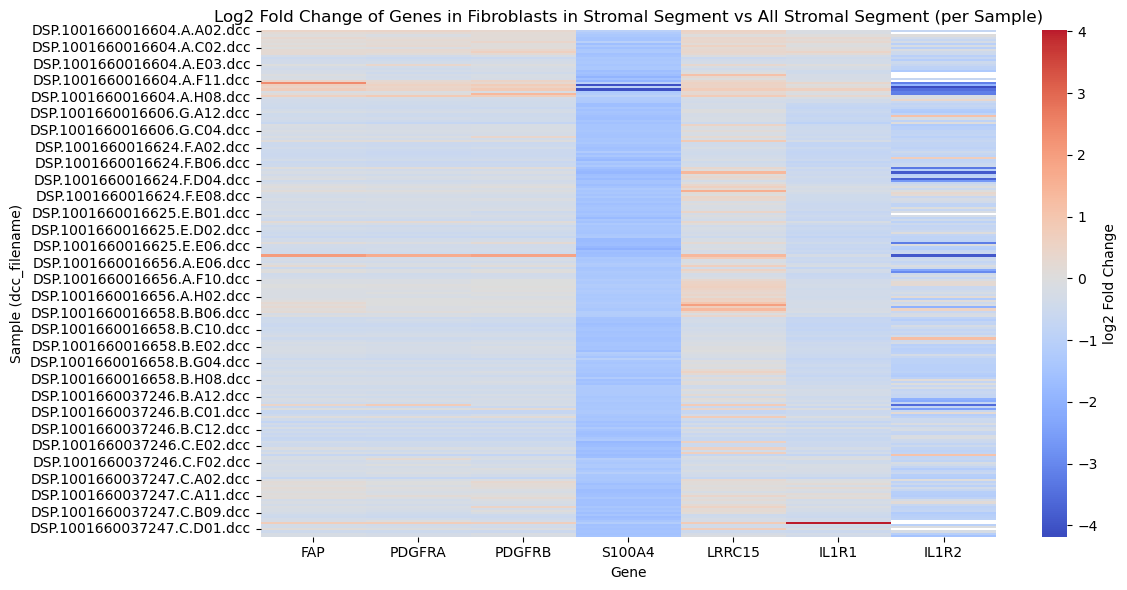

In [81]:
plt.figure(figsize=(12, 6))
sns.heatmap(log2fc_plot, cmap='coolwarm', center=0, annot=False, fmt=".2f", cbar_kws={"label": "log2 Fold Change"})
plt.title("Log2 Fold Change of Genes in Fibroblasts in Stromal Segment vs All Stromal Segment (per Sample)")
plt.xlabel("Gene")
plt.ylabel("Sample (dcc_filename)")
plt.tight_layout()
plt.show()

In [82]:
fib_expr_subset = fibr_gene_expression_modified_stroma[["dcc_filename","TGFB1","TGFB2","TGFB3", "TGFBR1","TGFBR2","TGFBR3","IL6", "IL6R", "IL10RA","IL10RB", "CXCL8", "CXCL12", 
 "CCR5", "CXCR2", "CXCR1", "CXCR4", "CXCL10","CXCL9","HGF", "MET", "FGF1","FGF2","FGF7","FGF10", "FGFR1","FGFR2","FGFR3","FGFR4"]]
stroma_expr_subset = stromal_gene_expression[["dcc_filename","TGFB1","TGFB2","TGFB3", "TGFBR1","TGFBR2","TGFBR3","IL6", "IL6R", "IL10RA","IL10RB", "CXCL8", "CXCL12","CCR5", "CXCR2", "CXCR1", "CXCR4", "CXCL10","CXCL9","HGF", "MET", 
 "FGF1","FGF2","FGF7","FGF10", "FGFR1","FGFR2","FGFR3","FGFR4"]]

In [83]:
pseudo = 1e-6  # To avoid division by zero
genes =["TGFB1","TGFB2","TGFB3", "TGFBR1","TGFBR2","TGFBR3","IL6", "IL6R", "IL10RA","IL10RB", "CXCL8", "CXCL12", 
 "CCR5", "CXCR2", "CXCR1", "CXCR4", "CXCL10","CXCL9","HGF", "MET", "FGF1","FGF2","FGF7","FGF10", "FGFR1","FGFR2","FGFR3","FGFR4"]

# Merge the two dataframes on dcc_filename
merged = pd.merge(
    fib_expr_subset[["dcc_filename"] + genes],
    stroma_expr_subset[["dcc_filename"] + genes],
    on="dcc_filename",
    suffixes=("_fib", "_stroma")
)

# Compute log2 fold change for each gene
log2fc = pd.DataFrame()
log2fc["dcc_filename"] = merged["dcc_filename"]

for gene in genes:
    fib_col = f"{gene}_fib"
    stroma_col = f"{gene}_stroma"
    log2fc[gene] = np.log2((merged[fib_col] + pseudo) / (merged[stroma_col] + pseudo))

# View result
print(log2fc.head())


                  dcc_filename     TGFB1     TGFB2     TGFB3    TGFBR1  \
0  DSP.1001660016604.A.A02.dcc -0.764633  0.036842  0.808690 -0.323557   
1  DSP.1001660016604.A.A04.dcc -1.329385 -0.154424  0.467386 -0.598530   
2  DSP.1001660016604.A.A08.dcc -1.057442 -0.206351  0.203096 -0.223595   
3  DSP.1001660016604.A.B02.dcc -0.820068 -0.062854  0.214131 -0.350146   
4  DSP.1001660016604.A.B06.dcc -0.933870  0.295720  0.552679  0.224349   

     TGFBR2    TGFBR3       IL6      IL6R    IL10RA  ...       HGF       MET  \
0 -0.860201 -0.226766  0.299183 -1.062660 -3.661690  ...  0.051423 -0.953512   
1 -0.878248  0.437042  0.040456 -1.112199 -3.889994  ...  0.038788 -1.421585   
2 -1.127078 -0.499601  0.029654 -1.097483 -3.340240  ... -0.139158 -1.061837   
3 -0.803594 -0.249164  0.050588 -1.004273 -2.370315  ...  0.044313 -0.982693   
4 -1.016429 -0.152010  0.312318 -0.962366 -3.965744  ...  0.052298 -1.106529   

       FGF1      FGF2      FGF7     FGF10     FGFR1     FGFR2     FGFR3  \

/opt/anaconda3/envs/geomx/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/geomx/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/geomx/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/geomx/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/geomx/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/geomx/lib/python3.9/site-packages/pandas/core

In [84]:
log2fc_plot = log2fc.set_index("dcc_filename")

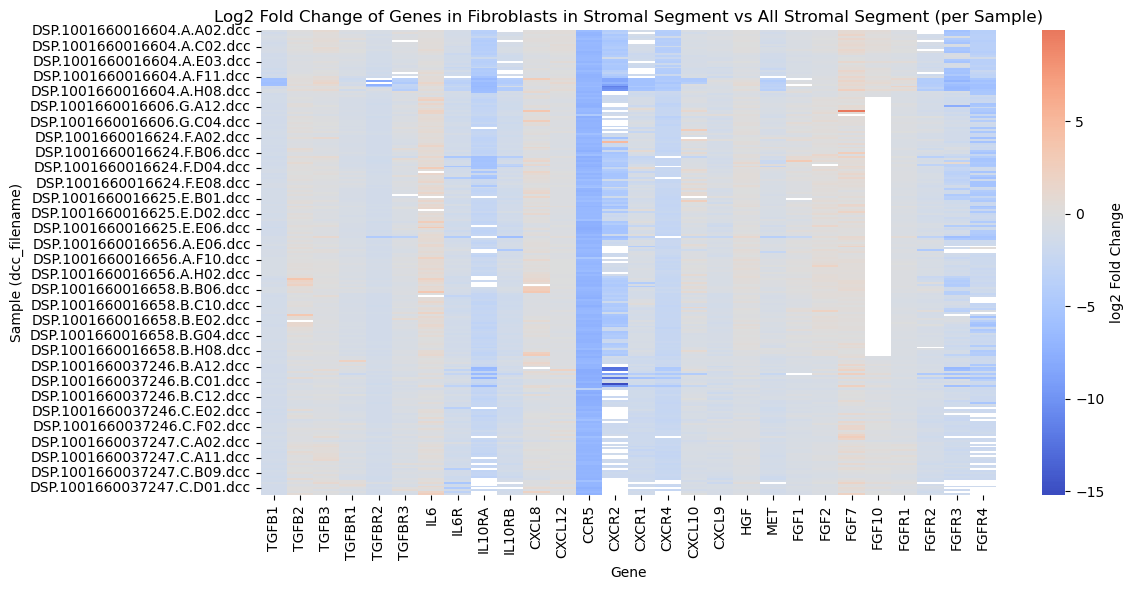

In [85]:
plt.figure(figsize=(12, 6))
sns.heatmap(log2fc_plot, cmap='coolwarm', center=0, annot=False, fmt=".2f", cbar_kws={"label": "log2 Fold Change"})
plt.title("Log2 Fold Change of Genes in Fibroblasts in Stromal Segment vs All Stromal Segment (per Sample)")
plt.xlabel("Gene")
plt.ylabel("Sample (dcc_filename)")
plt.tight_layout()
plt.show()

In [86]:
_, adj_pvals, _, _ = multipletests(p_values, method='fdr_bh')

NameError: name 'p_values' is not defined

In [ ]:
results = pd.DataFrame({
    'Gene': target_CAFs,
    'log2FC': log2fc.values,
    'p_value': p_values,
    'adj_p_value': adj_pvals
}).set_index('Gene')

sns.barplot(x=results.index, y='log2FC', data=results, palette='coolwarm')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('log2(Fibroblast / Stroma)')
plt.xticks(rotation=90)
plt.title('Gene-level log2FC Comparison')
plt.tight_layout()
plt.show()


NameError: name 'p_values' is not defined